<a href="https://colab.research.google.com/github/AthiFiz/deepLearning/blob/main/TransferLearning_FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
!nvidia-smi

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
!pip install neptune-client

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                            target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE)

In [ ]:
import neptune.new as neptune
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [ ]:
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-feature-vector/versions/2"
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-b0-feature-vector/versions/1"

In [18]:
class NeptuneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        run["training/accuracy"].log(logs.get("accuracy"), step=epoch)
        run["training/loss"].log(logs.get("loss"), step=epoch)
        run["validation/val_accuracy"].log(logs.get("val_accuracy"), step=epoch)
        run["validation/val_loss"].log(logs.get("val_loss"), step=epoch)

In [21]:
run = neptune.init_run(
    project="athif.ai/TransferLearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MWM3MTc4ZC04NTMxLTRiMzItODY4Ny1mNDkxY2RmYTFiOTUifQ==")
run['sys/tags'].add('ResNet-Run')

resnet_model = create_model(resnet_url, train_data_10_percent.num_classes)

resnet_model.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[NeptuneCallback()])
run.stop()

https://app.neptune.ai/athif.ai/TransferLearning/e/TRAN-5
Epoch 1/5
24/24 [==============================] - 22s 598ms/step - loss: 1.9151 - accuracy: 0.3680 - val_loss: 1.1847 - val_accuracy: 0.6364
Epoch 2/5
24/24 [==============================] - 13s 545ms/step - loss: 0.8983 - accuracy: 0.7440 - val_loss: 0.8497 - val_accuracy: 0.7336
Epoch 3/5
24/24 [==============================] - 11s 449ms/step - loss: 0.6144 - accuracy: 0.8253 - val_loss: 0.7410 - val_accuracy: 0.7704
Epoch 4/5
24/24 [==============================] - 11s 476ms/step - loss: 0.4655 - accuracy: 0.8827 - val_loss: 0.6824 - val_accuracy: 0.7844
Epoch 5/5
24/24 [==============================] - 11s 480ms/step - loss: 0.3714 - accuracy: 0.9267 - val_loss: 0.6825 - val_accuracy: 0.7796
Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/athif.ai/TransferLearning/e/TRAN-5/metadata


In [22]:
run = neptune.init_run(
    project="athif.ai/TransferLearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MWM3MTc4ZC04NTMxLTRiMzItODY4Ny1mNDkxY2RmYTFiOTUifQ==")
run['sys/tags'].add('EfficientNet-Run')

efficientnet_url = create_model(efficientnet_url, train_data_10_percent.num_classes)

resnet_model.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[NeptuneCallback()])

run.stop()

https://app.neptune.ai/athif.ai/TransferLearning/e/TRAN-6
Epoch 1/5
24/24 [==============================] - 14s 500ms/step - loss: 0.3438 - accuracy: 0.9107 - val_loss: 0.6514 - val_accuracy: 0.7852
Epoch 2/5
24/24 [==============================] - 11s 448ms/step - loss: 0.2325 - accuracy: 0.9573 - val_loss: 0.6253 - val_accuracy: 0.7896
Epoch 3/5
24/24 [==============================] - 11s 490ms/step - loss: 0.1712 - accuracy: 0.9760 - val_loss: 0.6294 - val_accuracy: 0.7872
Epoch 4/5
24/24 [==============================] - 12s 496ms/step - loss: 0.1373 - accuracy: 0.9867 - val_loss: 0.6361 - val_accuracy: 0.7940
Epoch 5/5
24/24 [==============================] - 13s 544ms/step - loss: 0.1108 - accuracy: 0.9920 - val_loss: 0.6282 - val_accuracy: 0.7916
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
All 4 operations synced, thanks for waiting!
Explore the metadata in the Nept

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

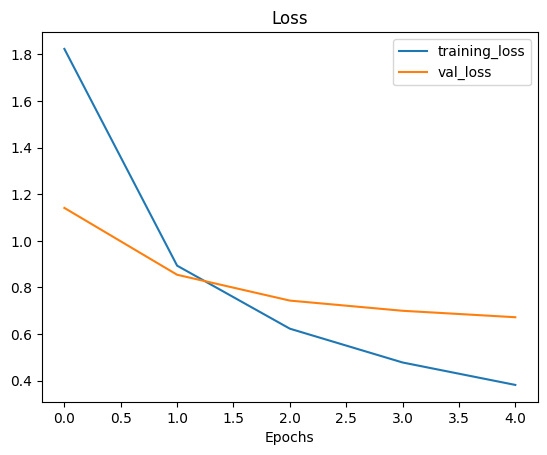

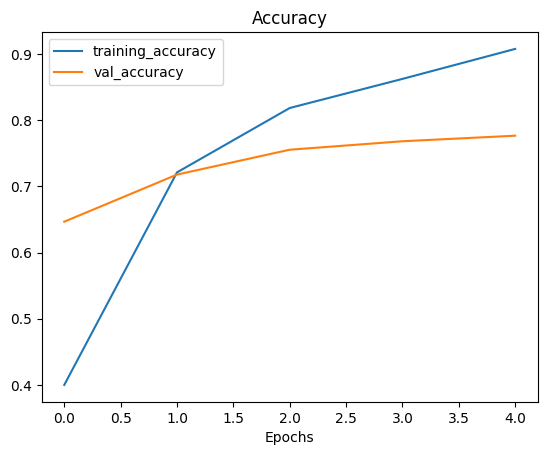

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
# Resnet summary
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20231117-134859
Epoch 1/5
24/24 [==============================] - 20s 508ms/step - loss: 1.6614 - accuracy: 0.4867 - val_loss: 0.6325 - val_accuracy: 0.7940
Epoch 2/5
24/24 [==============================] - 9s 386ms/step - loss: 0.6165 - accuracy: 0.8107 - val_loss: 0.4960 - val_accuracy: 0.8360
Epoch 3/5
24/24 [==============================] - 10s 435ms/step - loss: 0.4061 - accuracy: 0.8720 - val_loss: 0.4034 - val_accuracy: 0.8656
Epoch 4/5
24/24 [==============================] - 10s 445ms/step - loss: 0.2731 - accuracy: 0.9147 - val_loss: 0.3848 - val_accuracy: 0.8736
Epoch 5/5
24/24 [==============================] - 9s 389ms/step - loss: 0.1959 - accuracy: 0.9533 - val_loss: 0.3586 - val_accuracy: 0.8812


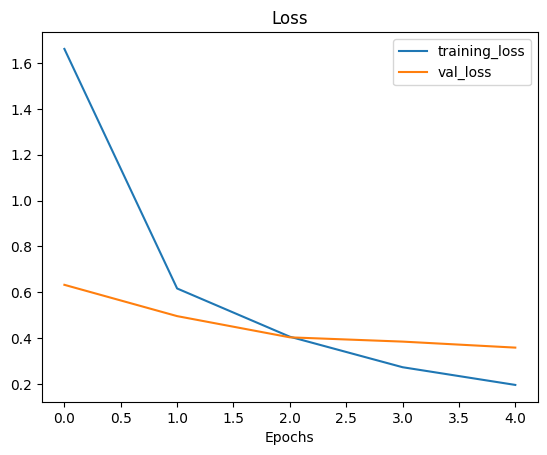

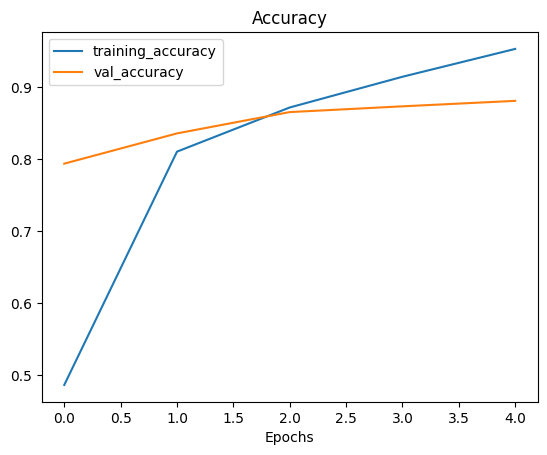

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2023-11-17 13:50:17.237186: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 13:50:17.237245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 13:50:17.237286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 13:50:18.750685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use 